# <p style="text-align: center;">Airline Customer Satisfaction
## <p style="text-align: center;">by: Kratika Sharma
Understanding what resonates with travellers with data from different countries, airlines and classes.

In [1]:
import time
start = time.time()

In [2]:
# Importing libraries for modelling & sentiment ananlysis tasks

from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
warnings.filterwarnings('ignore')

## Data Preprocessing

In [3]:
data_airline=pd.read_csv('D:\Avani\Project\DBMS Project\Final DBMS\Airline-Dataset.csv') # loading data

In [4]:
data_airline.columns

Index(['Unnamed: 0', 'airline_name', 'author', 'author_country', 'content',
       'cabin_flown', 'overall_rating', 'seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating', 'Month', 'Year',
       'recommended'],
      dtype='object')

In [5]:
data_airline.head()

,Unnamed: 0,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,1,adria-airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,2,adria-airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,3,adria-airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,4,adria-airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


In [6]:
#Separating the dataset into categorical and numerical variables
# Filter only the top 6 US airlines 

US_airlines_top_6 = ['allegiant-air','american-airlines','delta-air-lines','frontier-airlines','united-airlines','us-airways']
data_airline1 = data_airline[data_airline['airline_name'].isin(US_airlines_top_6)]

In [9]:
data_airline1.shape

(2439, 15)

In [14]:
da1 = pd.DataFrame(data_airline1[['cabin_flown']])
da1['cabin_flown'].unique()

array(['Economy', 'Business Class', 'Premium Economy', 'First Class'],
      dtype=object)

In [15]:
#dummy coding the cabin type variable
dummy = pd.get_dummies(data_airline1[['cabin_flown']])
dummy

,cabin_flown_Business Class,cabin_flown_Economy,cabin_flown_First Class,cabin_flown_Premium Economy
4825,0,1,0,0
4840,0,1,0,0
4848,0,1,0,0
4855,0,1,0,0
4874,0,1,0,0
...,...,...,...,...
25694,0,1,0,0
25695,0,0,0,1
25696,0,0,1,0
25697,0,0,0,1


In [16]:
# taking the variable of interest in the new dataset
data_airline2=data_airline1[['seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating', 'Month', 'Year',
       'recommended']]

In [17]:
for item in dummy.columns:
    data_airline2[item]=dummy[item]

In [18]:
data_airline2.shape

(2439, 12)

In [19]:
data_airline2.head()

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended,cabin_flown_Business Class,cabin_flown_Economy,cabin_flown_First Class,cabin_flown_Premium Economy
4825,1.0,1.0,1.0,1.0,1.0,7,2015,0,0,1,0,0
4840,3.0,2.0,1.0,1.0,3.0,7,2015,1,0,1,0,0
4848,5.0,5.0,5.0,3.0,5.0,7,2015,1,0,1,0,0
4855,1.0,1.0,1.0,1.0,1.0,7,2015,0,0,1,0,0
4874,2.0,2.0,2.0,1.0,2.0,7,2015,0,0,1,0,0


## Sentiment Analysis

In [20]:
import nltk
nltk.download('vader_lexicon')

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...


In [21]:
#gives the sentiment for each review using nltk vader (positive, negative and compound score)
def Sentiment_Polarity(dataframe):
    compound=[]
    pos=[]
    neg = []
    neu = []
    for sentence in dataframe['content']: #reading each review one by one
       # Create a SentimentIntensityAnalyzer object
        sid = SentimentIntensityAnalyzer()
           # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
        ss = sid.polarity_scores(sentence)
        compound.append(ss['compound']) # getting the compound score
        pos.append(ss['pos']) # getting the positive score 
        neg.append(ss['neg']) # getting the negative score
        neu.append(ss['neu']) # getting the neutral score
    compound_series = pd.Series(compound)
    pos_series = pd.Series(pos)
    neg_series = pd.Series(neg)
    neu_series = pd.Series(neu)
    dataframe['Compound'] = compound_series.values
    dataframe['Positive'] = pos_series.values
    dataframe['Negative'] = neg_series.values
    dataframe['Neutral'] = neu_series.values
    #return dataframe['Polarity']

In [22]:
Sentiment_Polarity(data_airline) # calling the function for our data

## Word Cloud

In [25]:
# Wordcloud for most common words occuring for best rated airline in US and least rated airline in US

!pip install WordCloud install if required
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
mask = np.array(Image.open(requests.get('http://clipart-library.com/images/8cznoea9i.jpg', stream=True).raw))
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [26]:
# filtering important words

nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def cleaning(s):
    from string import punctuation
    for p in punctuation:
        s =s.replace(p,'')
    s=s.lower()
    s =re.sub('[0-9]+','',s)
    words =re.findall('\w+',s)
    words =re.findall('\w+',s)
    wnl = nltk.WordNetLemmatizer()
    filtered_words = [w for w in words if not w in stop_words]
    filtered_words=[wnl.lemmatize(t) for t in filtered_words]
    new=""
    for x in filtered_words: 
            new += x + ' ' 
    for i in ['ed','flight', 'airline', 'plane', 'us', 'united', 'delta', 'hour', 'time', 'airport','told','flying','luggage','tomer','seat','another','ua','chicago','two','got','back','find','later','service']:
        new=new.replace(i," ")
        
    return new

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


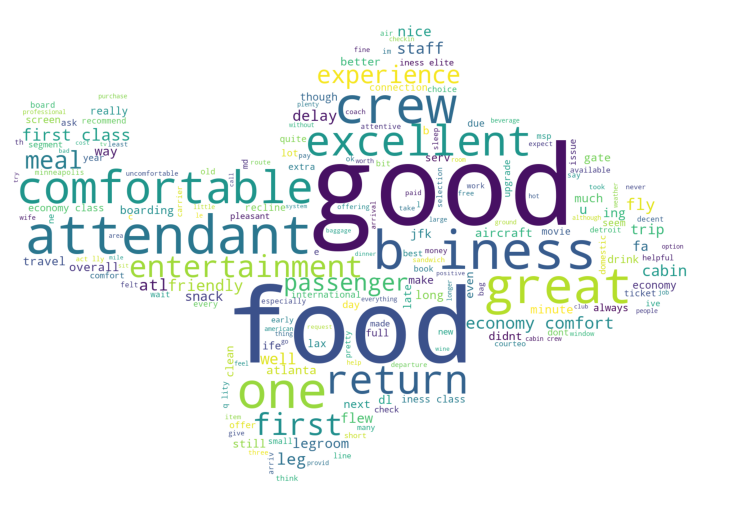

In [28]:
#Positive Sentiment of travellers for Delta (we can see words like excellent, comfortable, good entertainment, nice)
nltk.download('wordnet')
mask_1= (data_airline['airline_name']=="delta-air-lines") & (data_airline['author_country']=="United States") & (data_airline['Compound']>0.5)
Positive_Sentiment=data_airline[mask_1]['content']
Positive_Comments=Positive_Sentiment.str.cat(sep='').replace("'","")
word_cloud_positive=cleaning(Positive_Comments)
generate_wordcloud(word_cloud_positive, mask)

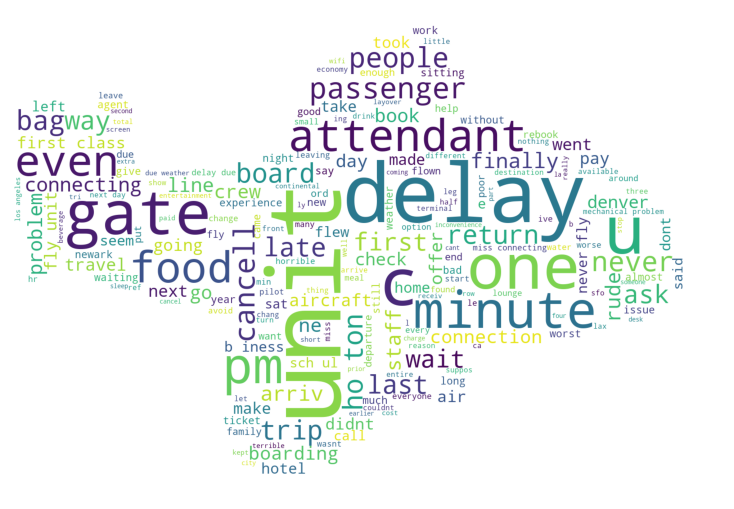

In [29]:
#Negative Sentiment of travellers for united-airlines (we can see words like delay, never, rude, etc)

mask_2= (data_airline['airline_name']=="united-airlines") & (data_airline['author_country']=="United States") & (data_airline['Compound']<-0.5)
Negative_Sentiment=data_airline[mask_2]['content']
Negative_Comments=Negative_Sentiment.str.cat(sep='').replace("'","")
word_cloud_negative=cleaning(Negative_Comments)
generate_wordcloud(word_cloud_negative, mask)

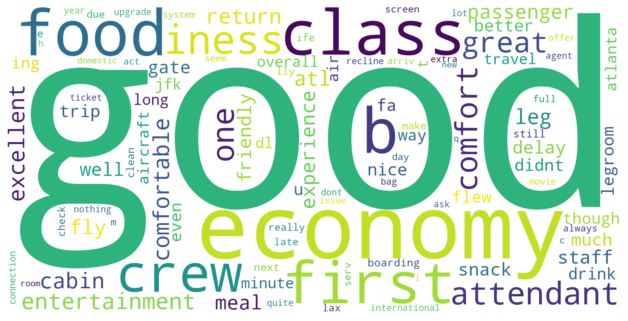

In [30]:
#Positive Sentiment for Delta Airlines (visualized again for better resolution)

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white",collocations=False).generate(word_cloud_positive)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

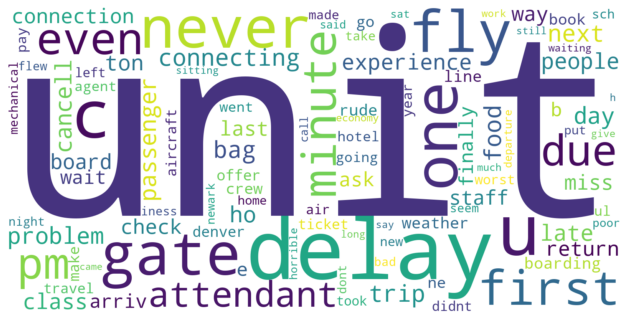

In [31]:
#Negative Sentiment for Delta Airlines (visualized again for better resolution)

wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white",collocations=False).generate(word_cloud_negative)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Split Train and Test

In [37]:
#Modelling tasks
#Splitting of train & test data

train_num=int(data_airline2.shape[0]*0.8) #taking 80% data as test data
columns=[]
for x in data_airline2.columns:
    if x !='recommended':
        columns.append(x)

X_train=data_airline2[columns][:train_num] # creating train data x variables
y_train=data_airline2['recommended'][:train_num] # creating train data y variable
X_test=data_airline2[columns][train_num:] # doing the same for test data
y_test=data_airline2['recommended'][train_num:]

## Logistic Regression

In [38]:
#Fitting of logistic regression on Recommended using cross validation method

lr=LogisticRegression() # fitting logistic regression
lrcv = GridSearchCV(lr,param_grid = { 
    'C':[0.1,1,10,100] # defining the parameter grid
}, cv=5)

In [39]:
pred=lrcv.fit(X_train,y_train).predict(X_test) #predicting the result on test data

In [40]:
pred_proba=lrcv.predict_proba(X_test) #getting predicted probabilities

In [41]:
lrcv.best_params_ #checking the best parameter for the model

{'C': 10}

In [42]:
confusion_matrix(y_test, pred) #evaluating the model with confusion matrix

array([[314,  21],
       [ 15, 138]], dtype=int64)

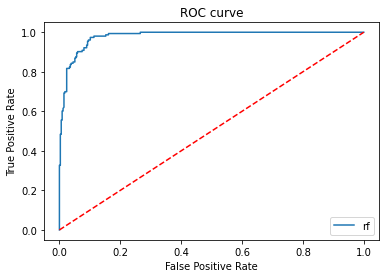

In [43]:
#ploting the ROC curve(Region under the curve)
roc_auc = roc_auc_score(y_test, pred) #calculate ROC score
fpr, tpr,threshold = roc_curve(y_test, pred_proba[:,1]) #get the false positive and true positive rate along with the threshold

plt.figure()
plt.plot(fpr, tpr,label='rf' % roc_auc) #plot the curve
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [44]:
lr_importance=LogisticRegression(C= 100) #refitting the model with the best parameter

In [45]:
lr_importance.fit(X_train,y_train) # getting important variables identiifed by the model

LogisticRegression(C=100)

In [46]:
#Key variables that are important

feature_importance = abs(lr_importance.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importances = pd.DataFrame(feature_importance,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'value_money_rating'),
  Text(1, 0, 'cabin_staff_rating'),
  Text(2, 0, 'cabin_flown_Premium Economy'),
  Text(3, 0, 'cabin_flown_First Class'),
  Text(4, 0, 'seat_comfort_rating')])

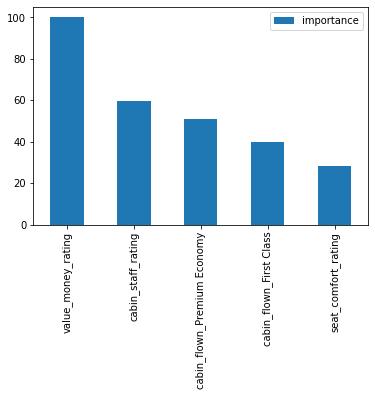

In [47]:
feature_importances[:5].plot(kind='bar')
plt.xticks(rotation=90) # ploting the top 5 important features

In [48]:
pred_lr=lr_importance.predict(X_test)
confusion_matrix(y_test, pred_lr)

array([[314,  21],
       [ 16, 137]], dtype=int64)

In [49]:
accuracy_score(y_test, pred_lr) #checking the accuracy with the best parameter obtained above

0.9241803278688525

## Random Forest

In [50]:
# Random forest
rf = RandomForestClassifier() #Create parameter grid for the model to select the best ones
rfcv = GridSearchCV(rf,param_grid = { 
    
    'n_estimators': [200,300,400, 500],
    'criterion' :['gini', 'entropy']
}, cv=5)

## Extra parameters tested for Random Forest

# {
#     'bootstrap': [True],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth' : [6,7,8],
#     'criterion' :['gini', 'entropy'],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

In [51]:
fit=rfcv.fit(X_train,y_train) # Fitting the model on the train data
pred=fit.predict(X_test) #test the model on testing data

In [52]:
pred_proba=rfcv.predict_proba(X_test) # Get the predicted probabilities

In [53]:
rfcv.best_params_ # check for the best parameters

{'criterion': 'entropy', 'n_estimators': 400}

In [54]:
confusion_matrix(y_test, pred) # Confusion matrix

array([[312,  23],
       [ 23, 130]], dtype=int64)

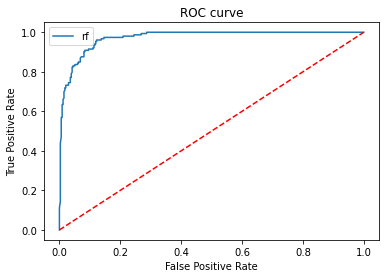

In [55]:
## Plotting the ROC curve for random forest
roc_auc = roc_auc_score(y_test, pred)
fpr, tpr,threshold = roc_curve(y_test, pred_proba[:,1])

plt.figure()
plt.plot(fpr, tpr,label='rf' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [56]:
rf_importance=RandomForestClassifier(n_estimators= 400,criterion='gini') #Fitting model again with the best parameters

In [57]:
rf_importance.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'value_money_rating'),
  Text(1, 0, 'cabin_staff_rating'),
  Text(2, 0, 'seat_comfort_rating'),
  Text(3, 0, 'food_beverages_rating'),
  Text(4, 0, 'inflight_entertainment_rating')])

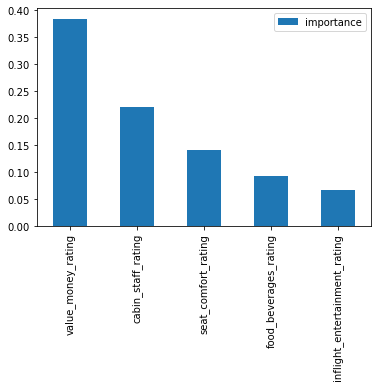

In [58]:
#Key Variables that are important

feature_importances = pd.DataFrame(rf_importance.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_importances[:5].plot(kind='bar')
plt.xticks(rotation=90)

In [59]:
## Time taken to run the entire code on local
end = time.time()
print(end - start)

#6.7 minutes

6668.683814287186
